In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn
import pandas as pd
import utils

In [2]:
data = pd.read_excel('数据科学实践Data/Grad-Line.xlsx')

In [3]:
features = data.drop(columns=['Y house price of unit area', 'No'])
labels = data['Y house price of unit area']

In [4]:
batch_size, num_epochs, alpha = 32, 50, 0.01
data_iter, W, b = utils.load_data(batch_size, features, labels)

In [5]:
def mbgd(data_iter, num_epochs, alpha, W, b):
    loss_list = []
    loss = nn.MSELoss()
    optimizer = torch.optim.SGD([W, b], alpha)
    for _ in range(num_epochs):
        sum_loss = 0
        for X, y in data_iter:
            optimizer.zero_grad()
            y_hat = torch.mm(X, W) + b       
            l = loss(y_hat.squeeze(1), y)
            l.backward()
            optimizer.step()
            sum_loss += l.item() / len(y)
        loss_list.append(sum_loss / len(data_iter))
    return loss_list, W, b

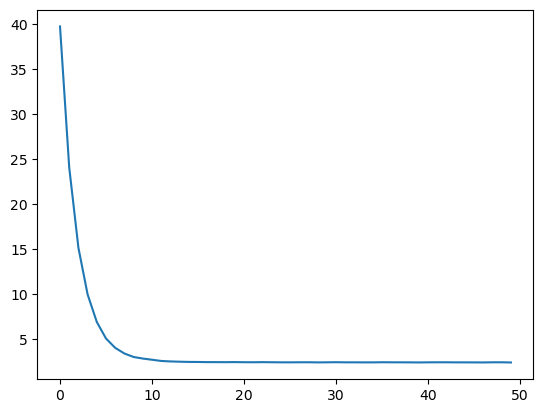

In [6]:
loss_list, W, b = mbgd(data_iter, num_epochs, alpha, W, b)
plt.plot(loss_list)

In [7]:
W, b

(tensor([[ 1.4271],
         [-3.0620],
         [-5.1060],
         [ 3.4142],
         [ 2.9072],
         [ 0.1392]], requires_grad=True),
 tensor([37.9770], requires_grad=True))

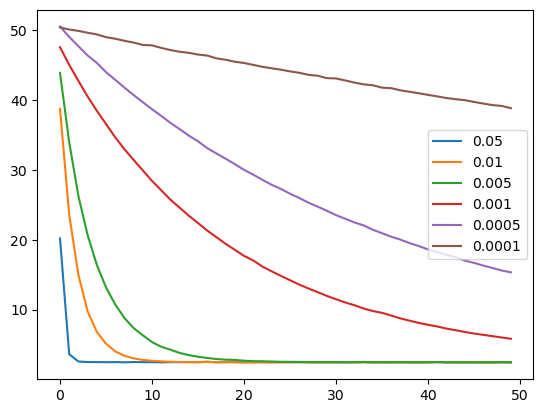

In [8]:
alpha_range = [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
list_ = []
for alpha in alpha_range:
    data_iter, W, b = utils.load_data(batch_size, features, labels)
    loss_list, W, b = mbgd(data_iter, num_epochs, alpha, W, b)
    list_.append(loss_list)
for i, loss_list in enumerate(list_):
    plt.plot(loss_list, label=alpha_range[i])
plt.legend()
plt.show()

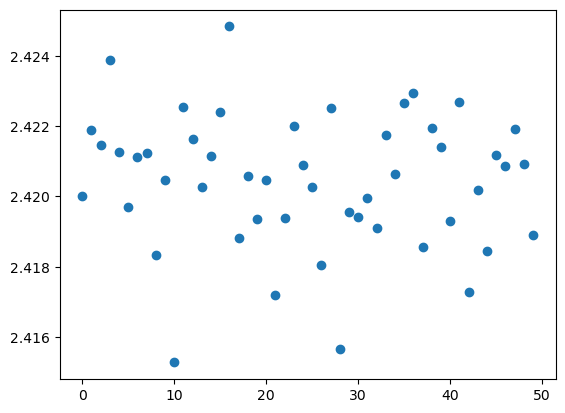

In [9]:
alpha, num_epochs = 0.01, 50
num_runs, list_ = 50, []
for _ in range(num_runs):
    data_iter, W, b = utils.load_data(batch_size, features, labels)
    list_.append(mbgd(data_iter, num_epochs, alpha, W, b)[0])

plt.scatter(list(range(num_runs)), [min(x) for x in list_])